In [1]:
from batch import BatchResult
batch_params = {
    "N": [200],
    "province": ["Ontario"],
    "random_seed": range(0,7),
    "n_segregation_steps": [40],
    "global_util_thresh": [0.1],
    "price_weight_mode": [0.3],
    "ts_step_length": ["w"],
    "start_year": 2020,
    "refurbishment_rate": 0.03,
    "hp_subsidy": 0.8,
}

res = BatchResult.from_parameters(batch_params, max_steps=120)


results_dir=WindowsPath('c:/src/canadopt/abetam/results/subsidy_tracking/202cb4a5d93942f3f399966b048da137') exists, loading results


# Calculation of subsidies

Total amount of subsidies $T^S$

$$
T^S = \sum_y N^p_y * s * P_y 
$$
with 
* Purchase price at year $y$: $P_y$
* subsidy fraction $s$
* amount of purchases in a year $N^p_y$

where $P_y = C_{y,i} * \dot{D}$ 

In [2]:
if not res.path.exists():
    res.save()

<Axes: xlabel='year', ylabel='Cumulative subsidy amount (CAD)'>

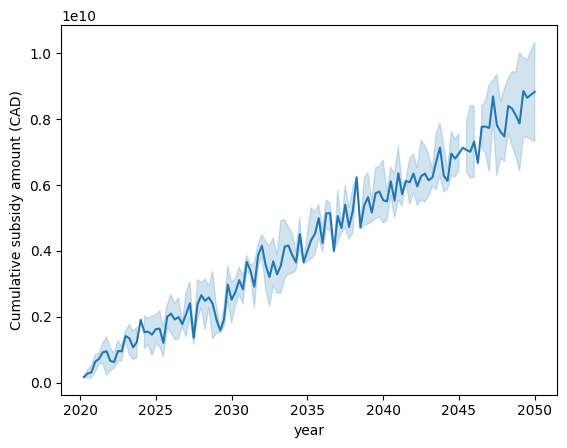

In [3]:
res.subsidies_fig()

# Calculation of emissions


In [6]:
res.emissions().head()

,Fuels.ELECTRICITY,Fuels.HEATING_OIL,Fuels.NATURAL_GAS,Fuels.WOOD_OR_WOOD_PELLETS
2020,0.455003,1.360998,18.541089,0.122649
2021,0.457778,1.492932,18.001186,0.140586
2022,0.460554,1.624865,17.461283,0.158523
2023,0.463330,1.756799,16.921379,0.176460
2024,0.466105,1.888733,16.381476,0.194397


In [7]:
import plotly.express as px

fig = px.line(res.emissions().cumsum(), template="plotly")
fig.update_layout(yaxis_title="CO2 Emissions (Mt)", width=500)